# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [91]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

### Importo el DataFrame obtenido en el lab anterior:

In [93]:
competition = pd.read_csv("datasets/competition_data.csv")
competition

,Competition,Localscore,Roadscore,Plusminus,Ganador
0,Eurocup,111,113.0,-2.0,Visitante
1,Eurocup,78,97.0,-19.0,Visitante
2,Eurocup,66,86.0,-20.0,Visitante
3,Eurocup,85,92.0,-7.0,Visitante
4,Eurocup,64,68.0,-4.0,Visitante
...,...,...,...,...,...
368,Euroleague,92,82.0,10.0,Local
369,Euroleague,72,76.0,-4.0,Visitante
370,Euroleague,79,73.0,6.0,Local
371,Euroleague,88,84.0,4.0,Local


Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [94]:
competition.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador
171,Euroleague,96,81.0,15.0,Local


#### **Criterio de colores:**

Si hay Local/Road Scores en la gráfica entonces los colores son amarillo y verde respectivamente. Si no se cumple lo anterior, entonces Eurocup en azul y Euroleague en naranja.


In [95]:
# 1
competition["Competition"].value_counts()

Competition
Euroleague    203
Eurocup       170
Name: count, dtype: int64

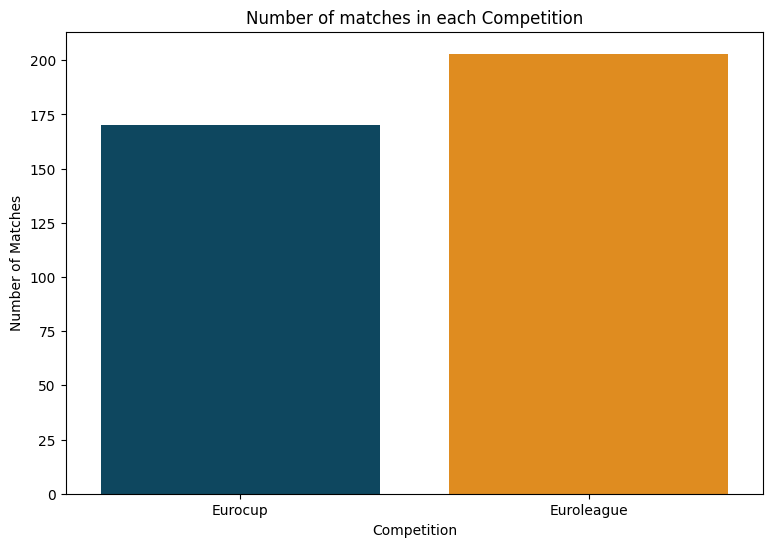

In [195]:
colores_= ["#004c6d", "#FF9000"] 
plt.figure(figsize=(9,6))
sns.countplot(x=competition.Competition, palette=colores_)
plt.title("Number of matches in each Competition")
plt.xlabel("Competition")
plt.ylabel("Number of Matches")
plt.show();

El plot es coherente con el .value_counts() calculado anteriormente.

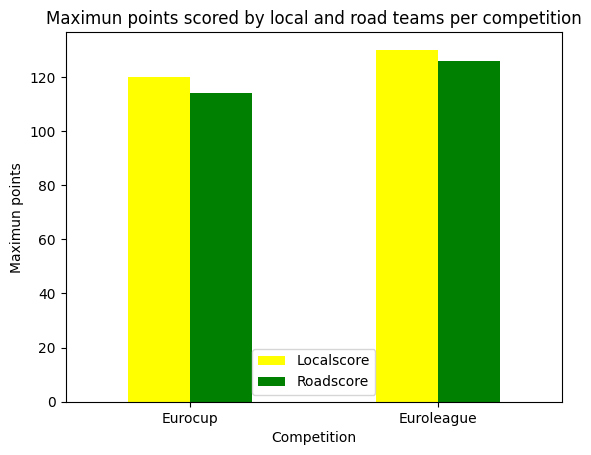

In [197]:
# 2
maximum_points=competition.groupby("Competition")[["Localscore","Roadscore"]].max()

maximum_points.plot(kind="bar", color=["yellow","green"])
plt.title("Maximun points scored by local and road teams per competition")
plt.xlabel("Competition")
plt.ylabel("Maximun points")
plt.xticks(rotation=0);

In [99]:
# 3
average_points=competition.groupby("Competition")[["Localscore","Roadscore"]].mean()

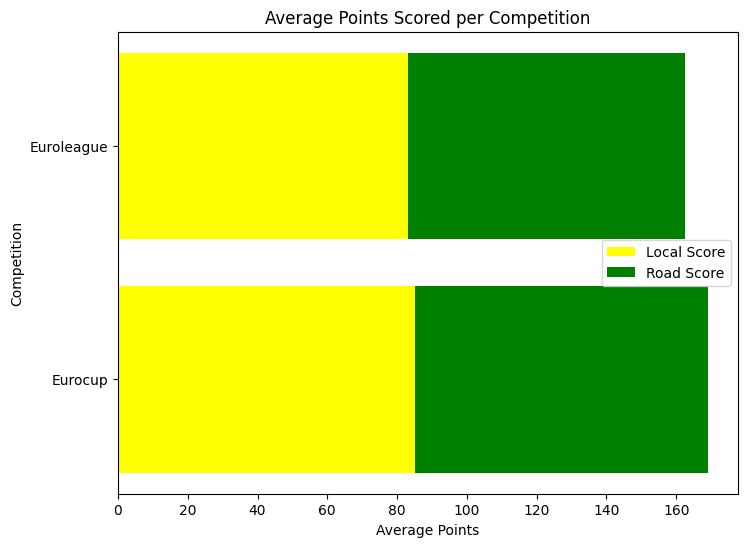

In [204]:
average_points = competition.groupby("Competition")[["Localscore", "Roadscore"]].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.barh(average_points["Competition"], average_points["Localscore"], color="yellow", label="Local Score")
plt.barh(average_points["Competition"], average_points["Roadscore"], left=average_points["Localscore"], color="green", label="Road Score")

plt.title("Average Points Scored per Competition")
plt.xlabel("Average Points")
plt.ylabel("Competition")
plt.legend()
plt.show()

In [101]:
# 4
competition["Absolut_Plusminus"] = np.where(competition["Plusminus"]<0,-competition["Plusminus"],competition["Plusminus"])

In [102]:
diferencias=competition.groupby("Competition")["Absolut_Plusminus"].max()

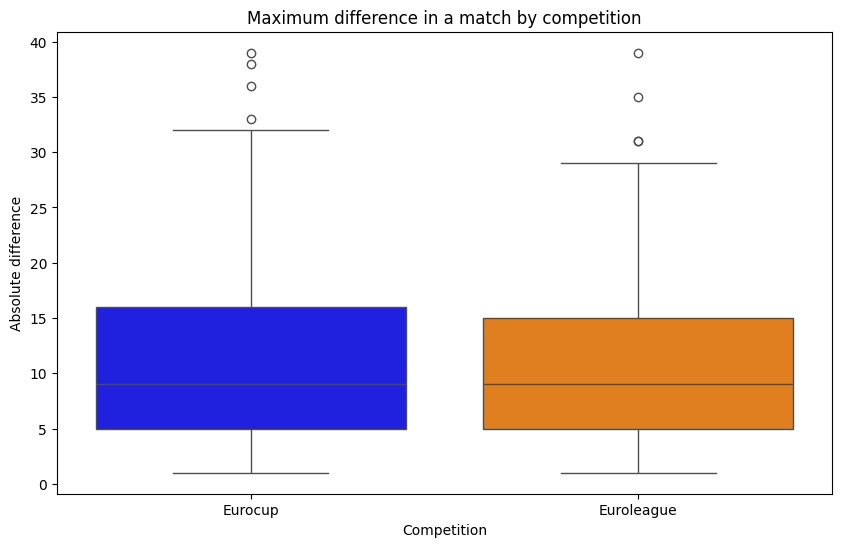

In [193]:
colores={"Eurocup": "blue", "Euroleague": "#FF7F00"}

plt.figure(figsize=(10, 6))
sns.boxplot(x="Competition", y="Absolut_Plusminus", data=competition, palette=colores)
plt.title("Maximum difference in a match by competition")
plt.xlabel("Competition")
plt.ylabel("Absolute difference")
plt.xticks(rotation=0)
plt.show()

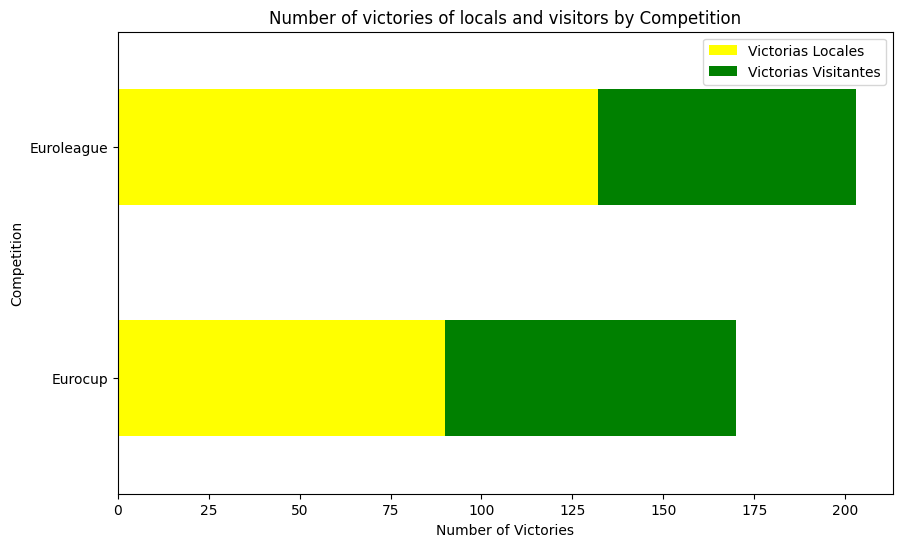

In [199]:
# 5
victorias.plot(kind="barh", stacked=True, figsize=(10, 6), color=["yellow","green"])

plt.title("Number of victories of locals and visitors by Competition")
plt.xlabel("Number of Victories")
plt.show()

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

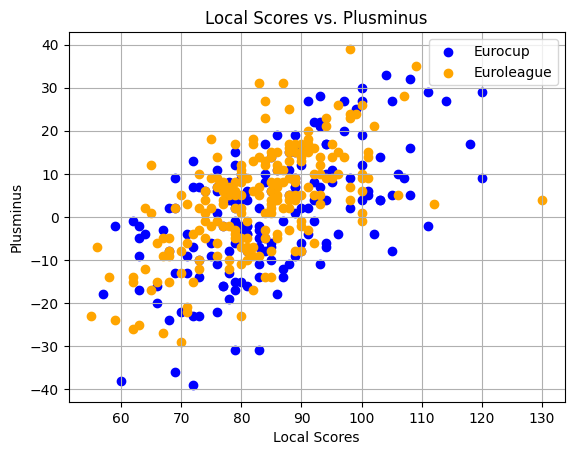

In [203]:
# 1 Comparison Chart
# Se quiere ver si existe correlación entre Local Scores y Plusminus por lo que se va a realizar una Scatter plot para estudiar si es válida la hipótesis.
plt.scatter(competition[competition["Competition"]=="Eurocup"]["Localscore"], 
            competition[competition["Competition"]=="Eurocup"]["Plusminus"], 
            c="blue", label="Eurocup")

plt.scatter(competition[competition["Competition"]=="Euroleague"]["Localscore"], 
            competition[competition["Competition"]=="Euroleague"]["Plusminus"], 
            c="orange", label="Euroleague")

plt.title("Local Scores vs. Plusminus")
plt.xlabel("Local Scores")
plt.ylabel("Plusminus")
plt.legend()
plt.grid(True)
plt.show()

**Your comments here**

A partir de la gráfica superior se puede observar que para ambas competiciones existe correlación entre Plusminus y Local Scores. Esto era esperable ya que para números "pequeños", no es posible que las diferencias sean "grandes". A medida que crecen los valores de Local Score y Road Score, las diferencias pueden tomar valores mayores.
El valor absoluto del Plusminus nunca puede superar al máximo entre el Local y el Road Score, por lo que ese máximo limita al Plusminus.
Por ejemplo, en partidos de fútbol, el Plusminus nunca vale 100, ya que el máximo entre el Local y el Road Score casi siempre es menor a 10. Ahora, si los partidos tuvieran resultados del entorno de los 1000 goles, ahí sería posible que hubieran diferencias de 100 y probablemente se darían con frecuencia. 

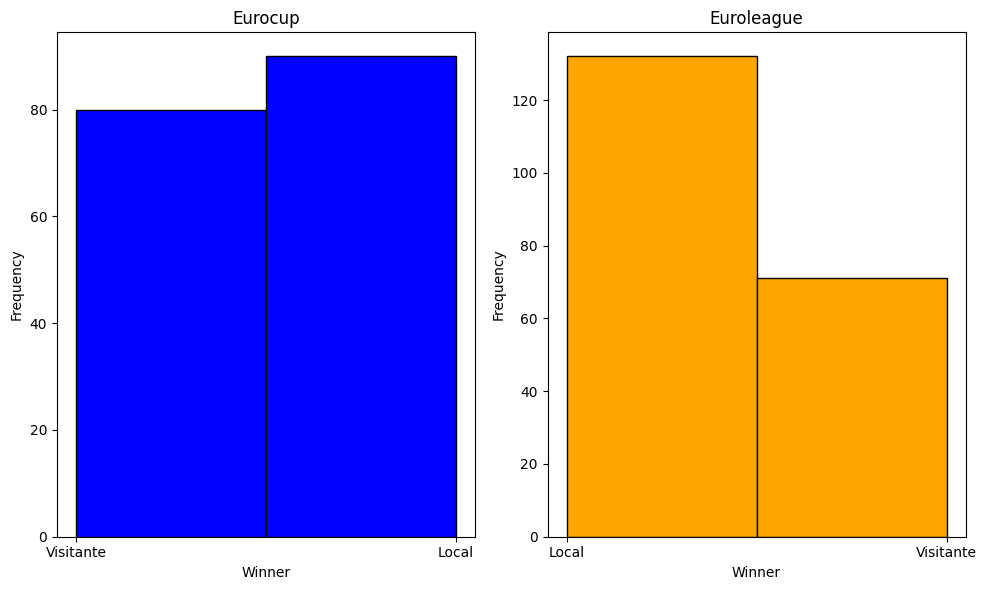

In [200]:
# 2 Histogram
# Se quiere estudiar la relación entre las victorias locales y las visitantes para cada liga. Se espera que para ambas ligas, las victorias locales sean mayores.
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(competition[competition["Competition"]=="Eurocup"]["Ganador"], bins=2, color="blue", edgecolor="black")
plt.title("Eurocup")
plt.xlabel("Winner")
plt.ylabel("Frequency")
plt.xticks(rotation=0) 

plt.subplot(1, 2, 2)
plt.hist(competition[competition["Competition"]=="Euroleague"]["Ganador"], bins=2, color="orange", edgecolor="black")
plt.title("Euroleague")
plt.xlabel("Winner")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Your comments here**

El resultado es coherente con la hipótesis planteada en la cell anterior. Es razonable que hayan más victorias locales que visitantes porque en esos casos los jugadores juegan con más comodidad. Es decir, no tienen que estar alquilando hoteles, tienen más apoyo de las tribunas, etc (hay excepciones pero en general es así). Es notable que en el caso de Euroleague, la proporción *victorias locales: victorias visitantes* es mayor que en la Eurocup. Supongo que para entender esa diferencia habría que tener cierto contexto de la situación (ver partidos de basketball, estar informado).

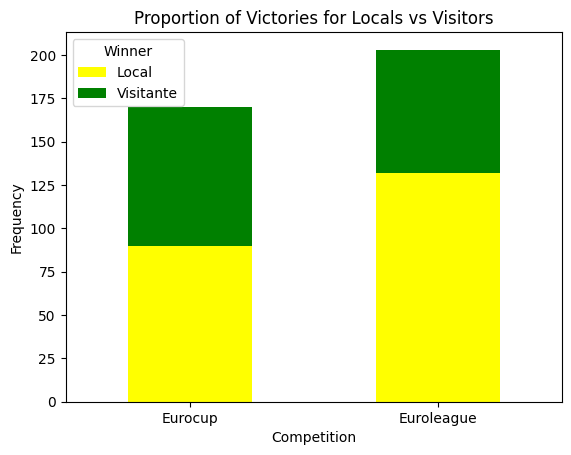

In [201]:
# 3 Stacked columns
#Este plot sirve para estudiar el mismo caso que el anterior pero con otra representación. Se van a hacer las stacked columns para ver si aporta mayor claridad que el histograma.

agrupado=competition.groupby(["Competition", "Ganador"]).size().unstack()
agrupado.plot(kind="bar", stacked=True, color=["yellow","green"])

plt.title("Proportion of Victories for Locals vs Visitors")
plt.xlabel("Competition")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Winner")
plt.show()

**Your comments here**

Me resulta más claro de visualizar el histograma ya que hay que hacer menos estimaciones, pero básicamente aportan la misma información.

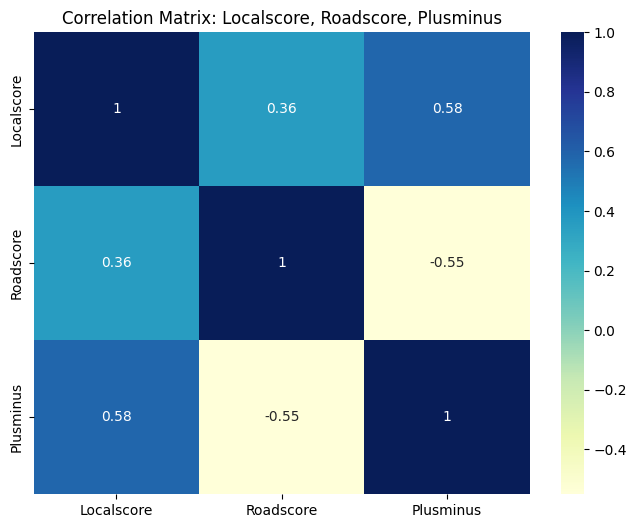

In [132]:
# 4 Correlation / Heatmap
correlationn=competition[["Localscore", "Roadscore", "Plusminus"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlationn, annot=True, cmap="YlGnBu") #Con annot=True se ponen los valores de correlación dentro de el heatmap
plt.title("Correlation Matrix: Localscore, Roadscore, Plusminus")
plt.show()

**Your comments here**

Las correlation matrixes son simétricas por lo que solo se va a analizar una mitad (separada de la otra por la diagonal de 1s). Esta matriz no está separada por competición, incluye ambas ligas. Se puede apreciar que hay una correlación positiva moderada entre Plusminus y LocalScore lo cual es coherente con la gráfica de Scatter. Hay otra correlación también positiva pero un poco menor, entre Road Score y Local Score, y por último se ve que hay una correlación negativa moderada entre Plusminus y Road Score. Ambas correlaciones moderadas, tanto la positiva como la negativa, son muy similares en valor absoluto lo cual creo que puede ser explicado de forma análoga a la explicación de la gráfica de Scatter (la correlación entre Plusminus con Local Scores).


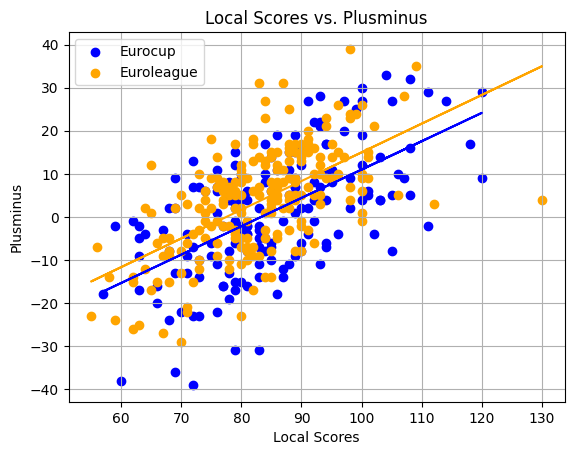

Correlation for Eurocup: 0.59
Correlation for Euroleague: 0.60


In [133]:
# 5 Trends
# Se va a utilizar la gráfica de Scatter que se hizo para la parte (#1) y se le van a agregar las líneas de mejor ajuste (una para Euroleague y otra para Eurocup):
plt.scatter(competition[competition["Competition"]=="Eurocup"]["Localscore"], 
            competition[competition["Competition"]=="Eurocup"]["Plusminus"], 
            c="blue", label="Eurocup")

plt.scatter(competition[competition["Competition"]=="Euroleague"]["Localscore"], 
            competition[competition["Competition"]=="Euroleague"]["Plusminus"], 
            c="orange", label="Euroleague")

#Eurocup
x_eurocup = competition[competition["Competition"]=="Eurocup"]["Localscore"]
y_eurocup = competition[competition["Competition"]=="Eurocup"]["Plusminus"]
coefficients_eurocup = np.polyfit(x_eurocup, y_eurocup, 1)  
poly_eurocup = np.poly1d(coefficients_eurocup)
plt.plot(x_eurocup, poly_eurocup(x_eurocup), color='blue')

#Euroleague
x_euroleague = competition[competition["Competition"]=="Euroleague"]["Localscore"]
y_euroleague = competition[competition["Competition"]=="Euroleague"]["Plusminus"]
coefficients_euroleague = np.polyfit(x_euroleague, y_euroleague, 1)  
poly_euroleague = np.poly1d(coefficients_euroleague)
plt.plot(x_euroleague, poly_euroleague(x_euroleague), color='orange')

plt.title("Local Scores vs. Plusminus")
plt.xlabel("Local Scores")
plt.ylabel("Plusminus")
plt.legend()
plt.grid(True)
plt.show()

#Coeficientes de correlación:
cor_ec= np.corrcoef(x_eurocup, y_eurocup)[0, 1]
print("Correlation for Eurocup:", format(cor_ec, ".2f"))

cor_el=np.corrcoef(x_euroleague, y_euroleague)[0, 1]
print("Correlation for Euroleague:", format(cor_el, ".2f"))

**Your comments here**

No fue necesario poner este diagrama enseguida después del plot de scatter porque este contiene al anterior. Se incluyeron las líneas de mejor ajuste y calcularon los valores de correlación. Viendo las gráficas se puede ver que hay una correlación clara y los números lo confirman (corr~0.6 para cada caso). Algo que se puede ver en esta gráfica que no se podía apreciar en la anterior es que la inclinación de las rectas es esencialmente la misma. Creo que el hecho de que las correlaciones hayan dado prácticamente iguales es interesante, porque da indicios de que la correlación es independiente de la liga. Podría ser interesante calcular esta misma correlación para otras ligas del deporte para ver si también dan cercanas a 0.6. A su vez se puede observar que estos valores son muy cercanos al valor del Heatmap correspondiente con Local Scores y Plusminus (0.58) lo cual tiene sentido.